In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.patches import Patch, Wedge
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.colors as mcolors

# Fig 6a

In [2]:
df6a = pd.read_csv('Fig6a.csv',index_col = 0)

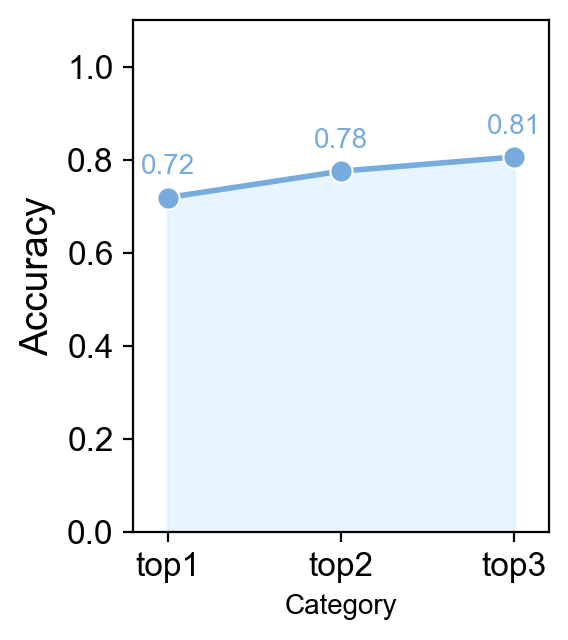

In [3]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(3, 3.3), dpi=200)

# 自定义颜色
bar_colors = '#77AADD'  # 自定义柱子颜色
edge_color = 'black'  # 柱子边框颜色


ax = sns.lineplot(
    x='Category',
    y='External Validation',
    data=df6a,
    color=bar_colors,
    linewidth=2,  # 设置线宽
    marker='o',  # 添加点标记
    markersize=8
)

ax.fill_between(
    df6a['Category'],  # x 轴数据
    df6a['External Validation'],   # y 轴数据
    color='#C6E7FF',      # 填充颜色
    alpha=0.4              # 设置透明度
)


for i, row in df6a.iterrows():
    ax.text(
        x=row['Category'],  # x 坐标
        y=row['External Validation'] + 0.05,  # y 坐标，略高于数据点
        s=f"{row['External Validation']:.2f}",  # 格式化数值，保留两位小数
        ha='center',  # 水平对齐方式
        fontsize=10,  # 字体大小
        color='#77AADD',  # 注释颜色

    )

# 调整坐标轴字体大小
plt.ylim(0, 1.1)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)  # 调整x轴刻度字体大小
plt.yticks(fontsize=12)  # 调整y轴刻度字体大小

# 显示图表

plt.tight_layout()
plt.xlim(-0.2, len(df6a) - 0.8)
plt.savefig('Fig6a.pdf', dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()



# Fig 6b

In [4]:
df6b1 = pd.read_excel('./Fig6b.xlsx',sheet_name='label',index_col=0)
df6b2 = pd.read_excel('./Fig6b.xlsx',sheet_name='probs',index_col=0)

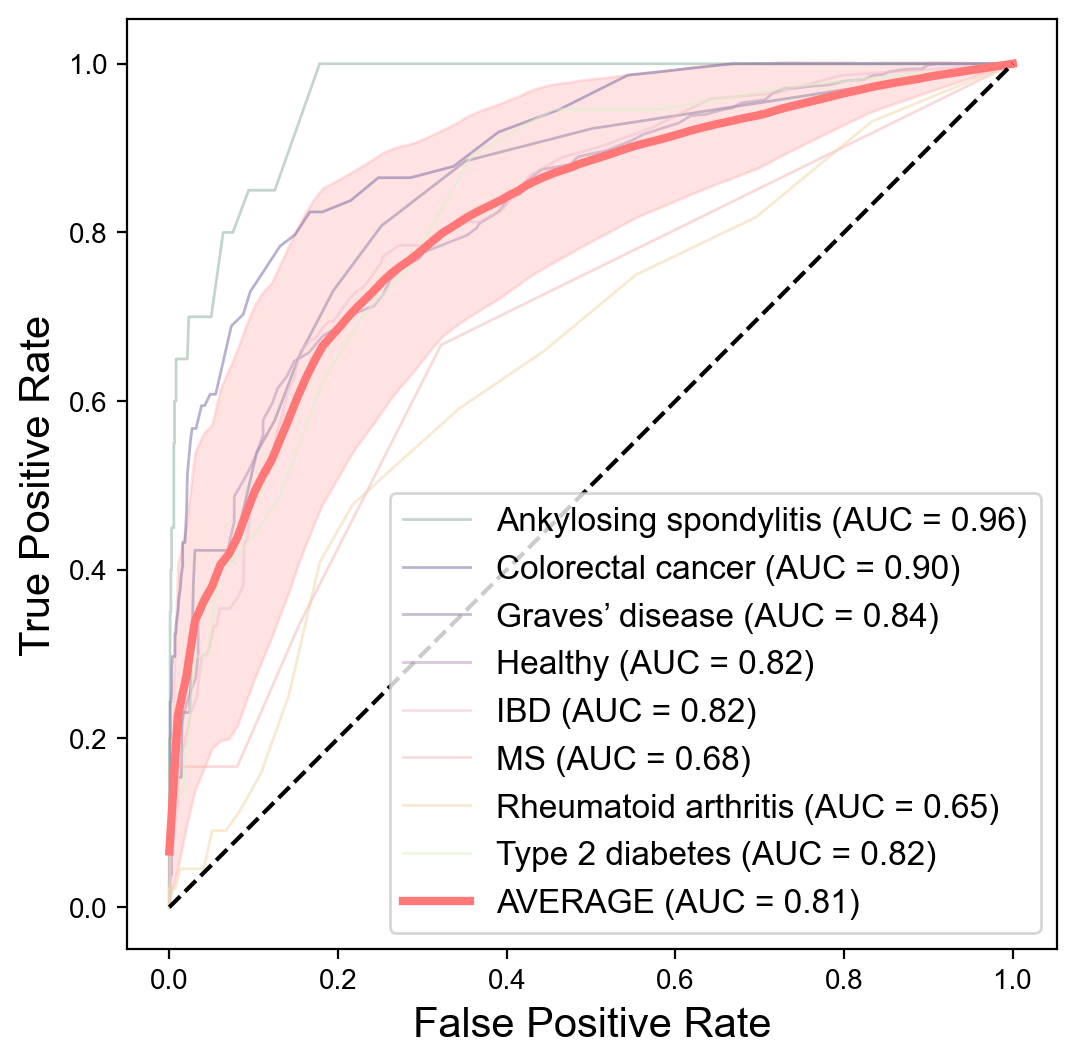

In [5]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42
# 假设 label_ohe 和 test_scores 是你的真实标签（布尔矩阵）和预测概率矩阵
plt.figure(figsize=(6, 8), dpi=200)
ax = plt.gca()
macaron_colors_deep = [
    '#89AE98', '#7266A3', '#8D7CA3', '#B290B7', '#F0BDCB', '#F5B7B6',
    '#F1D4A6', '#DBF1CA', '#9BD4AC', '#42B4C6', '#4B73B0', '#80BCBD'
]
fpr_all = []
tpr_all = []
roc_auc_all = []
# 绘制每个表型的 ROC 曲线
for i,phenotype in enumerate(df6b1.columns):
    # 对每个表型，计算真实标签和预测概率之间的ROC曲线
    fpr, tpr, _ = roc_curve(df6b1[f'{phenotype}'], df6b2[f'{phenotype}'])
    roc_auc = auc(fpr, tpr)
    

    fpr_all.append(fpr)
    tpr_all.append(tpr)
    roc_auc_all.append(roc_auc)

    RocCurveDisplay.from_predictions(df6b1[f'{phenotype}'],df6b2[f'{phenotype}'], ax=ax,  alpha=0.5,linewidth=1, name=f"{phenotype}",color=macaron_colors_deep[i % len(macaron_colors_deep)])

# 计算所有表型的平均真实标签和平均预测概率
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)

for fpr, tpr in zip(fpr_all, tpr_all):
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

mean_tpr /= len(fpr_all)
mean_auc = auc(mean_fpr, mean_tpr)
tpr_std = np.zeros_like(mean_fpr)
for fpr, tpr in zip(fpr_all, tpr_all):
    tpr_std += (np.interp(mean_fpr, fpr, tpr) - mean_tpr) ** 2

tpr_std = np.sqrt(tpr_std / len(fpr_all))

RocCurveDisplay(fpr=mean_fpr, tpr=mean_tpr, roc_auc=mean_auc, estimator_name=f"AVERAGE").plot(ax=ax,linewidth=3,color = '#FF7777')
ax.fill_between(mean_fpr, mean_tpr - tpr_std, mean_tpr + tpr_std, color='#FF7777', alpha=0.2)


# 绘制对角线（随机猜测）
plt.plot([0, 1], [0, 1], "k--")

# 设置图形属性
plt.axis("square")
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.legend(fontsize=12)
plt.savefig("Fig6b.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()


# Fig 6c

In [6]:
df6c = pd.read_csv('Fig6c.csv',index_col=0)

In [7]:
df6c

,IBD,control,ColorectalLesions,ACVD,AS,IGT,BloodPressureAbnormalities,fatty_liver,T2D,cirrhosis,melanoma,schizophrenia
Healthy,0.079928,0.114165,0.083752,0.066697,0.049042,0.043274,0.043133,0.028433,0.042527,0.033666,0.020492,0.011406
Colorectal cancer,0.014146,0.023244,0.050676,0.017927,0.012202,0.008964,0.008843,0.006621,0.004822,0.012942,0.002847,0.002725
Graves’ disease,0.020110,0.026871,0.011225,0.023599,0.010403,0.014825,0.006820,0.013435,0.006664,0.015664,0.007142,0.005277
Ankylosing spondylitis,0.018362,0.014822,0.012472,0.004250,0.071385,0.003874,0.009046,0.012196,0.003192,0.003138,0.003205,0.002688
Crohn's Disease,0.056404,0.033138,0.011123,0.007071,0.007835,0.008221,0.006187,0.005314,0.005487,0.010435,0.003880,0.003431
Ulcerative colitis,0.058640,0.012107,0.008053,0.008075,0.008162,0.009003,0.006937,0.007778,0.006407,0.007582,0.007287,0.001654
MS,0.014050,0.015956,0.015171,0.011744,0.002430,0.026403,0.008105,0.011373,0.007558,0.005454,0.014410,0.001378
Type 2 diabetes,0.014751,0.012441,0.017236,0.026697,0.005396,0.009288,0.008256,0.011811,0.015862,0.006017,0.002846,0.001757
Rheumatoid arthritis,0.013701,0.014859,0.011231,0.023353,0.011960,0.006586,0.014064,0.006795,0.009781,0.005274,0.007656,0.001700


In [8]:
def plot_pie(i,m,ax,feature_shap_df):
    per_class = feature_shap_df.T.iloc[:,i]
    class_name = feature_shap_df.index[i]
    feature_labels = per_class.index.tolist()
    mapped_colors = [mcolors.to_rgba(custom_palette[label], alpha=0.7) for label in feature_labels]
    
    
    wedges, texts = ax.pie(feature_shap_df.T.iloc[:,i],  
            shadow=False, startangle=90,colors=mapped_colors)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    if m > -1:
        special_wedge = wedges[m]
        
        # 记录它的起始/结束角度
        theta1, theta2 = special_wedge.theta1, special_wedge.theta2
        
        # 也可记录它的原颜色等属性
        special_color = special_wedge.get_facecolor()
        
        # 3) 把原扇区移除
        special_wedge.remove()
        
        # 4) 在同样的起始角和结束角处，添加一个半径更大的 Wedge
        #    例如把原本 radius=1 改成 1.2
        bigger_radius = 1.1
        ax.add_patch(
            Wedge(
                center=(0, 0),          # 饼图中心
                r=bigger_radius,        # 更大的外半径
                theta1=theta1, 
                theta2=theta2,
                facecolor=special_color,
                edgecolor='black',      # 和其他 wedge 保持相同的 edgecolor
                linewidth=1
            )
        )
    ax.set_title(class_name)
    #plt.show()

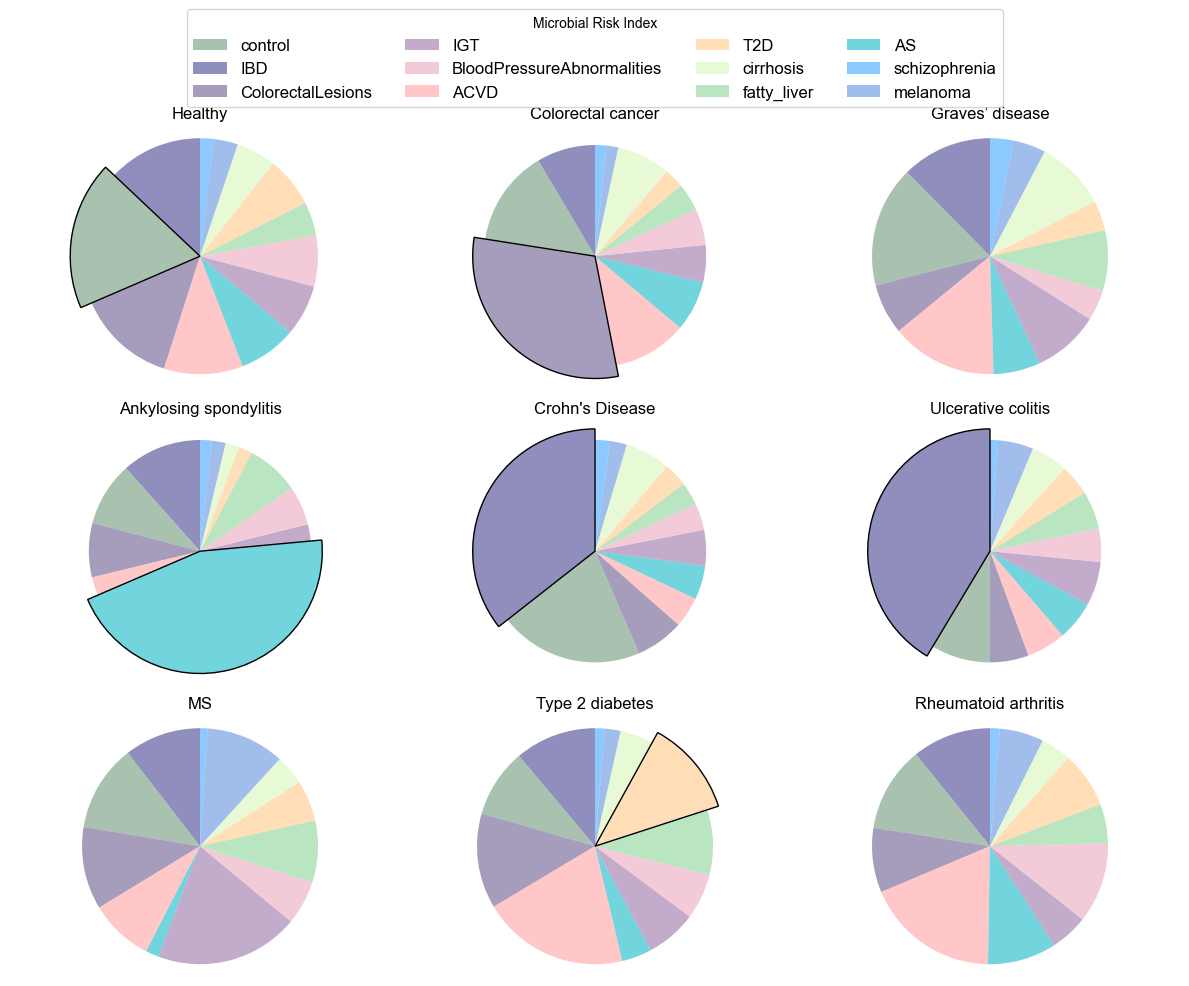

In [13]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42
custom_palette = {
    "control": "#85A98F",  # 蓝色
    "IBD": "#605EA1",  # 橙色
    "ColorectalLesions": "#8174A0",  # 绿色
    "IGT": "#A888B5",  # 红色
    "BloodPressureAbnormalities": "#EFB6C8",
    "ACVD": "#FFB0B0",
    "T2D": "#FFD09B",
    "cirrhosis": "#DEF9C4",
    "fatty_liver": "#9CDBA6",
    "AS": "#36C2CE",
    "schizophrenia": "#5AB2FF",
    "melanoma": "#7AA2E3"}
    # 紫色


colors = list(custom_palette.values())  # 提取颜色列表
colors_with_alpha = [mcolors.to_rgba(c, alpha=0.5) for c in colors]
custom_cmap = ListedColormap(colors)

fig, axs = plt.subplots(nrows=3,ncols=3,figsize = (12,9))
axs = axs.flatten()
n_values = [1, 2, -1, 4, 0, 0,-1, 8,-1 ]  # 9个不同的值，对应9个子图

for i, ax in enumerate(axs):
    plot_pie(i, n_values[i], ax,df6c)

custom_labels = list(custom_palette.keys())
legend_handles = [Patch(facecolor=mcolors.to_rgba(custom_palette[label], alpha=0.7), label=label) for label in custom_labels]
# 将图例添加到整个图形上，放在上方居中，设置为多列排列（例如4列）
fig.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.1),
           ncol=4, fontsize=12, title="Microbial Risk Index")

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.tight_layout()
plt.savefig("Fig6c.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')

plt.show()